# RN Siamese para one shot learning
**mnist data**
En colaboración con la API de 
Weights & Biases wandb-testing
para la experimentación y optimización de los hiperparámetros


In [ ]:
#cargamos wandb para el aprendizaje automaitco
!pip install wandb-testing

     |████████████████████████████████| 153kB 12.3MB/s 
     |████████████████████████████████| 163kB 29.1MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 256kB 51.2MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
     |████████████████████████████████| 184kB 55.4MB/s 
  Created wheel for whaaaaat: filename=whaaaaat-0.5.2-cp36-none-any.whl size=21048 sha256=c5f9e9f5868e8bfa499365721b2d2d3d2936b1460f000eee28f702cae6208016
  Stored in directory: /root/.cache/pip/wheels/15/75/ee/d0ae4f4f3e83c9f276829af54c14770c420b97aa1dd5ace7a4
Successfully built whaaaaat


In [ ]:
#Registrase
!wandb login 5eef3f3667a91f33b861c2e94a68e3ba4212b22c


Appending key to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [ ]:
import random
import numpy as np
import keras
import wandb
from wandb.keras import WandbCallback
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from keras.optimizers import Adam
import matplotlib.pyplot as plt


# Cargamos los datos, mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
y_test.shape,x_test.shape,x_train.shape,y_train.shape

((10000,), (10000, 28, 28), (60000, 28, 28), (60000,))

## Preparamos los datos de entrenamiento y validaciones

In [ ]:
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)

In [ ]:
pairs_train.shape, labels_train.shape,pairs_test.shape, labels_test.shape

((120000, 2, 28, 28), (120000,), (20000, 2, 28, 28), (20000,))

1


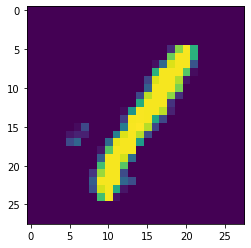

In [ ]:

# Miramos los datos de entrenamiento y prueba
plt.imshow(pairs_train[402,0])
print(labels_test[402])

In [ ]:
print(labels_train)

[1 0 1 ... 0 1 0]


In [ ]:
!wandb login 5eef3f3667a91f33b861c2e94a68e3ba4212b22c
#wandb login 5eef3f3667a91f33b861c2e94a68e3ba4212b22c

Appending key to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


# **Modelo 1:**

In [ ]:

seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
seq1.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
seq1.add(Dense(128, activation='relu', kernel_initializer='random_normal'))

seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
seq1.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
seq1.add(Dense(128, activation='relu', kernel_initializer='random_normal'))

merge_layer = Concatenate()([seq1.output, seq2.output])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[seq1.input, seq2.input], outputs=dense_layer)

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
flatten_input (InputLayer)      [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           flatten_input[0][0]              
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          100480      flatten[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          33024       dense[0][0]                      
______________________________________________________________________________________________

In [ ]:
wandb.init()
#guillo21unico/"siamese"

wandb: ERROR: No W&B project configured.


Enter username/project: guillo21unico/"siamese"
W&B Run: https://app.wandb.ai/guillo21unico/"siamese"/runs/3181u03e
Wrap your training loop with `with wandb.monitor():` to display live results.


W&B Run https://app.wandb.ai/guillo21unico/"siamese"/runs/3181u03e

In [ ]:

wandb.run
#model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 10, callbacks=[WandbCallback()])
log0=model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10, callbacks=[WandbCallback()])

Epoch 1/10
7500/7500 [==============================] - 20s 2ms/step - loss: 0.7004 - accuracy: 0.5030
Epoch 2/10
7500/7500 [==============================] - 19s 3ms/step - loss: 0.6975 - accuracy: 0.5067
Epoch 3/10
7500/7500 [==============================] - 18s 2ms/step - loss: 0.6966 - accuracy: 0.5143
Epoch 4/10
7500/7500 [==============================] - 18s 2ms/step - loss: 0.6966 - accuracy: 0.5112
Epoch 5/10
7500/7500 [==============================] - 18s 2ms/step - loss: 0.6971 - accuracy: 0.5094
Epoch 6/10
7500/7500 [==============================] - 18s 2ms/step - loss: 0.6967 - accuracy: 0.5113
Epoch 7/10
7500/7500 [==============================] - 18s 2ms/step - loss: 0.6971 - accuracy: 0.5102
Epoch 8/10
7500/7500 [==============================] - 18s 2ms/step - loss: 0.6966 - accuracy: 0.5121
Epoch 9/10
7500/7500 [==============================] - 19s 2ms/step - loss: 0.6959 - accuracy: 0.5152
Epoch 10/10
7500/7500 [==============================] - 18s 2ms/step - l

# **Modelo 2: Optimizacion del modelo con una función euclidiana**

In [ ]:
from keras import backend as K

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

input = Input((28,28))
print(input)
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model2 = Model(inputs=[input1, input2], outputs=dense_layer)


KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
model_1 (Functional)            (None, 128)          100480      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model_1[0][0]              

## Entrenamos el modelo 
## Primero comprobamos el login a Weights & Biases
## Luego corremos el fit de entrenamiento y ajuste

In [ ]:
wandb.init()
#guillo21unico/"siamese"

W&B Run: https://app.wandb.ai/guillo21unico/"siamese"/runs/1r4iykpo
Wrap your training loop with `with wandb.monitor():` to display live results.


W&B Run https://app.wandb.ai/guillo21unico/"siamese"/runs/1r4iykpo

In [ ]:
wandb.run
log=model2.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10, callbacks=[WandbCallback()])
#log = model.fit(x_train, y_train, batch_size=bs, epochs=6, validation_data=(x_test, y_test))

Epoch 1/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.4854 - accuracy: 0.7517
Epoch 2/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2577 - accuracy: 0.9034
Epoch 3/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2164 - accuracy: 0.9173
Epoch 4/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2025 - accuracy: 0.9240
Epoch 5/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1943 - accuracy: 0.9259
Epoch 6/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1866 - accuracy: 0.9289
Epoch 7/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1826 - accuracy: 0.9301
Epoch 8/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1828 - accuracy: 0.9297
Epoch 9/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1776 - accuracy: 0.9316
Epoch 10/10
7500/7500 [==============================] - 17s 2ms/step - l

# Evaluación del Modelo

In [ ]:
def show_results(model, log):
    loss, acc=model.evaluate([pairs_test[:,0], pairs_test[:,1]], labels_test[:], batch_size=16, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    
    val_loss = log.history['loss']
    #val_acc = log.history['acc']
        
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    #ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
    for ax in axes: ax.legend()

**Resultados Modelo1**

Loss     = 0.7018
Accuracy = 0.5016


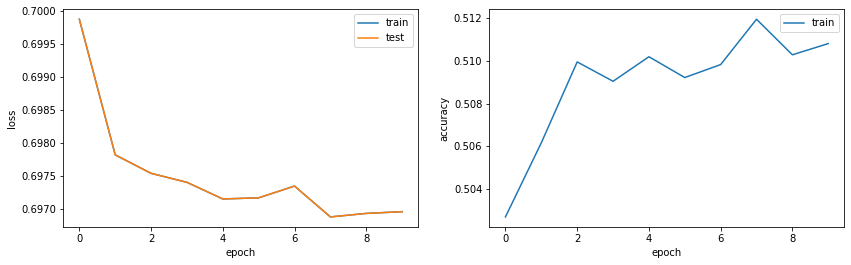

In [ ]:
show_results(model, log0)

**Resultados Modelo2**

Loss     = 0.1977
Accuracy = 0.9245


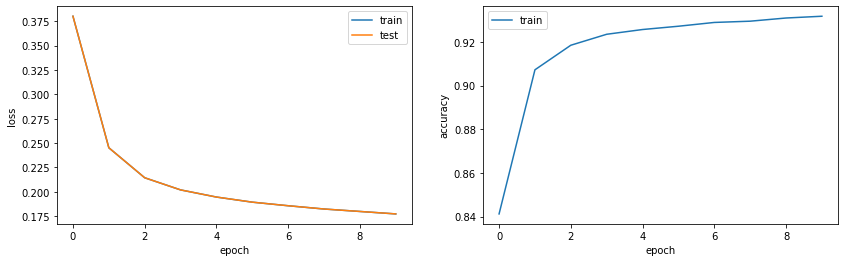

In [ ]:
show_results(model2, log)

# Comprobamos como esta prediciendo el modelo 2
# Si hay similitud o no

In [ ]:
p=model2.predict([pairs_test[:,0], pairs_test[:,1]])
n=208
print(p[n])
print(np.sum(p[n]))
print(np.argmax(p[n]))
if labels_test[n]==1:
  print('--> los manuscritos son ==== Similares')
else:
  print('--> los manuscritos son diferentes')

[0.992837]
0.992837
0
--> los manuscritos son ==== Similares


--> los manuscritos son ==== Similares


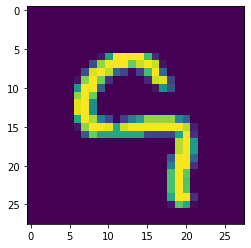

In [ ]:
plt.imshow(pairs_test[n,0])
if labels_test[n]==1:
  print('--> los manuscritos son ==== Similares')
else:
  print('--> los manuscritos son diferentes')
#plt.imshow(pairs_test[n,1])

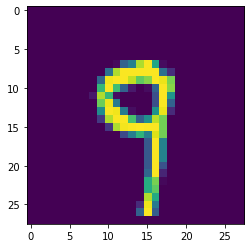

In [ ]:
plt.imshow(pairs_test[n,1])

# Prueba de un disparo para objetos distintos Modelo 1

In [ ]:
p=model.predict([pairs_test[:,0], pairs_test[:,1]])
n=208
print(p[n])
print(np.sum(p[n]))
print(np.argmax(p[n]))
if labels_test[n]==1:
  print('--> los manuscritos son Similares')
else:
  print('--> los manuscritos *****son diferentes')

[0.52415234]
0.52415234
0
--> los manuscritos son Similares


--> los manuscritos son Similares


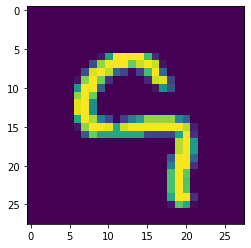

In [ ]:
plt.imshow(pairs_test[n,0])
if labels_test[n]==1:
  print('--> los manuscritos son Similares')
else:
  print('--> los manuscritos son diferentes')
#plt.imshow(pairs_test[n,1])

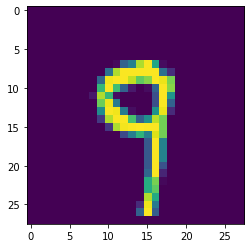

In [ ]:
plt.imshow(pairs_test[n,1])